<a href="https://colab.research.google.com/github/GuilhermeLBonomo/Automations/blob/main/Gui_Bonomo_Comp2_2024_1_Aula_10_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computação 2 &ndash; Aula 10 &ndash; 2024.1 <br>SciPy

Nesta semana, vamos olhar as funções da biblioteca **SciPy** &ndash; são funções numéricas para tarefas comuns como **integração**, **interpolação**, **ajuste linear**,  **transformada de Fourier**, entre outras.

Bons estudos!<br>
*Prof. Cesar Raitz*

# 1. Instalando o SciPy

O **SciPy** reúne várias funções usadas para resolução e modelagem de problemas. As funções estão reunidas em módulos:
* `scipy.linalg` para algoritmos de álgebra linear (igual ao `numpy.linalg`)
* `scipy.integrate` para integração numérica
* `scipy.interpolate` para interpolação de pontos
* `scipy.optimize` para resolver problemas de otimização
* `scipy.stats` para funções de estatística
* `scipy.fft` para calcular transformada de Fourier

A lista completa de módulos pode ser vista [aqui](https://docs.scipy.org/doc/scipy) na documentação.

Assim como as outras bibliotecas que vimos, o SciPy já está presente no Colab. **Se for usar no Python IDLE**, precisa instalar digitando este comando num Terminal do Windows ou Linux:
```
pip install scipy
```

# 2. Álgebra linear &ndash; linalg

Este módulo é semelhante ao `numpy.linalg`. O problema básico da Álgebra Linear é resolver sistemas lineares do tipo $A\, \vec{v} = \vec{c}$, onde
  
  * $A$ é uma matriz de coeficientes,
  * $\vec{v}$ é um vetor de incógnitas e
  * $\vec{c}$ é um vetor de constantes.
  
Para resolvê-lo, procuramos a matriz inversa $A^{-1}$ e obtemos o vetor solução $\vec{v}$:
$$
\begin{align}
  A^{-1} A\, \vec{v} &= A^{-1}\,\vec{c} \\
  \vec{v} &= A^{-1}\,\vec{c}.
\end{align}
$$.

## Matriz inversa

Abaixo temos um sistema linear com 3 incógnitas. Problemas deste tipo são trabalhosos de resolver, especialmente se o número de dimensões é grande.
$$
\begin{cases}
 3x -2y +5z &=& 14 \\
 4x + 3y -z &=& 7 \\
-2x -3y +2z &=& -2
\end{cases}
$$

O primeiro passo é encontrar a inversa da matriz de coeficientes
$$
A =
\begin{bmatrix}
   3 & -2 & 5 \\
   4 & 3 & -1 \\
   -2 & -3 & 2
\end{bmatrix}.
$$

Temos ainda o vetor de incógnitas $\vec{v} = (x, y, z)$ e o vetor de constantes $\vec{c} = (14, 7, -2)$.

O código a seguir mostra como inverter a matriz com a função `inv()`:

In [20]:
from scipy.linalg import inv
import numpy as np
A = np.array([
    [3, -2, 5],
    [4, 3, -1],
    [-2, -3, 2],
])
Ainv = inv(A)
Ainv

array([[-0.33333333,  1.22222222,  1.44444444],
       [ 0.66666667, -1.77777778, -2.55555556],
       [ 0.66666667, -1.44444444, -1.88888889]])

Você acredita que essa é a matriz inversa? Quem sabe? É fácil conferir pela propriedade $A^{-1} A = A A^{-1} = I$.

In [21]:
# Multiplicando a inversa pela esquerda
(Ainv @ A).round(2)
# (Ainv @ A)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
# Multiplicando a inversa pela direita
(A @ Ainv).round(2)
# (A @ Ainv)

array([[ 1.,  0.,  0.],
       [-0.,  1., -0.],
       [ 0.,  0.,  1.]])

Funciona mesmo! As multiplicações fornecem a **matriz identidade**. Não esqueça que `@` é o operador de multiplicação matricial. O método `round()` foi aplicado sobre a matriz resultante para arredondar os números com duas casas decimais. Isso porque queremos eliminar os números muito pequenos, como `-1.11022302e-16`, que podem aparecer quando o computador faz contas. São erros de computação devido ao **número limitado de bits** por variável, e podemos **considerá-los zero**.

Voltando ao problema, podemos aplicar $A^{-1}$ ao vetor de constantes para obter a solução (quando houver):

In [23]:
c = [14, 7, -2]
v = Ainv @ c
print(f"x = {v[0]:.2f}")
print(f"y = {v[1]:.2f}")
print(f"z = {v[2]:.2f}")

x = 1.00
y = 2.00
z = 3.00


Novamente fizemos um arredondamento com duas casas decimais, desta vez usando o formatador `.2f`.

## Resolvendo sistemas

Se seu objetivo for apenas resolver um sistema linear, você pode usar a função `solve`, que realiza o mesmo procedimento acima.

In [24]:
from scipy.linalg import solve

A = np.array([
    [3, -2, 5],
    [4, 3, -1],
    [-2, -3, 2],
])
c = [14, 7, -2]
solve(A, c)

array([1., 2., 3.])

O sistema acima tem **apenas uma solução**. Este sistema é chamado de **possível determinado**. Mas o que acontece quando o sistema **tem infinitas soluções** ou **nenhuma**? Ele terá infinitas soluções quando uma das equações for múltipla de outra. Neste caso, diz-se que o sistema é **possível indeterminado**, já que não podemos determinar uma solução única. Veja o seguinte exemplo, onde a terceira linha é o dobro da segunda (as constantes também):

In [25]:
Minf = np.array([
   [1, 0, 0],
   [1, 2, 3],
   [2, 4, 6],
])
cinf = [1, 2, 4]
solve(Minf, cinf)

LinAlgError: Matrix is singular.

Já sistemas sem solução são aqueles que todas linhas são múltiplas, mas as constantes não. São chamados de **impossíveis**. Veja este exemplo:

In [26]:
Msem = np.array([
   [1, 2, 3],     # fator 1
   [-1, -2, -3],  # fator -1
   [4, 8, 12],    # fator 4
])
csem = [1, 1, 1]
solve(Msem, csem)

LinAlgError: Matrix is singular.

Nos dois casos, houve a reclamação *Matrix is singular*. Significa simplesmente que a matriz não é inversível (*i.e.* não existe $A^{-1}$).

## Determinantes

Calcular o determinante de matrizes pode ser útil para calcular área de paralelogramos ou verificar se um sistema tem solução. Vou assumir que você rodou as células acima para criar as variáveis `A`, `Minf` e `Msem`.

In [27]:
from scipy.linalg import det
print(det(A))
print(det(Minf))
print(det(Msem))

-9.0
0.0
0.0


Percebeu que apenas o sistema com solução única (matriz $A$) tem determinante diferente de zero? 🤓

#### Exercício [&frac12; pt]. Inverso de matrizes retangulares.

Matrizes retangulares não possuem inverso. Ainda assim podemos criar uma matriz para obter uma solução em determinados problemas matemáticos de otimização. Essa matriz é chamada de **pseudo-inversa** e, para uma matriz $A$ de $m$ linhas por $n$ colunas, é dada por:

$$
X =
\begin{cases}
(A^T A)^{-1} A^T & \text{se }m \le n, \\
A^T (A A^T)^{-1} & \text{se }n \le n.
\end{cases}
$$

Escreva uma função para solucionar um sistema com matriz $A$ e constantes $\vec{b}$. Se a matriz for quadrada, a solução deve ser encontrada usando a função `solve` da bibliteca SciPy. Caso contrário, a solução deve ser calculada usando a pseudo-inversa (*i.e.* $X b$).

In [39]:
def inverter_reg(a: np.ndarray) -> np.ndarray:
    m, n = a.shape
    if m <= n:
        return np.linalg.inv(a.T @ a) @ a.T
    else:
        return a.T @ np.linalg.inv(a @ a.T)


def mat_reg_inv(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    m, n = a.shape
    if m == n:
        out = np.linalg.solve(a, b)
    else:
        pseudo_inversa = inverter_reg(a)
        out = pseudo_inversa @ b

    return out


m1 = np.array([[2, 3], [1, 4], [5, 6]])
m2 = np.array([10, 12, 15])


print(f"Solução para m1 e m2: {mat_reg_inv(m1, m2)}")

Solução para m1 e m2: [-2.296875  3.09375 ]


## Triangularização de matrizes

`linalg` tem funções para transformar as matrizes em **triangular superior** (os números abaixo da diagonal igual a zero) e **triangular inferior** (os números acima da diagonal principal igual a zero). Triangularizar a matriz é outra forma de resolver sistemas lineares, mas deixaremos a teoria para as aulas de Álgebra.

In [40]:
from scipy.linalg import tril, triu

X = np.array([[1,2,3], [3,2,1], [1,1,1]])
print("Matriz X:")
print(X)

print("\nX triangular superior:")
print(triu(X))

print("\nX triangular inferior:")
print(tril(X))

Matriz X:
[[1 2 3]
 [3 2 1]
 [1 1 1]]

X triangular superior:
[[1 2 3]
 [0 2 1]
 [0 0 1]]

X triangular inferior:
[[1 0 0]
 [3 2 0]
 [1 1 1]]


## Auto-vetores

**Auto-vetores** de uma matriz $A$ são os vetores que não são alterados pela multiplicação com a matriz $A$, a menos de um fator. Em geral, uma matriz quadrada $n\times n$ gera $n$ auto-vetores. A propriedade acima diz que:
$$
\begin{align}
 A\, \vec{v_1} &= \lambda_1 \vec{v_1} \\
 A\, \vec{v_2} &= \lambda_2 \vec{v_2} \\
 &... \\
 A\, \vec{v_n} &= \lambda_n \vec{v_n}
\end{align}
$$

onde $\vec{v_i}$ são os auto-vetores e $\lambda_i$ (*lambda*) são constantes chamadas de **auto-valores**. A função `eig` do módulo `linalg` retorna uma tupla com arrays de auto-valores e auto-vetores de uma matriz, se possível.

In [45]:
from scipy.linalg import eig

M = np.array([
    [1, 0, 3],
    [0, 2, 0],
    [3, 0, 1]
])
auto_valores, auto_vetores = eig(M)

print(f'auto_valores.real: {auto_valores.real}')  # mostra os auto-valores (a parte real)
print(f'auto_vetores: {auto_vetores}\n\n')  # mostra a matriz de auto-vetores

lambda1 = auto_valores[0]
lambda2 = auto_valores[1]
lambda3 = auto_valores[2]

av1 = auto_vetores[:, 0] # 1a coluna da matriz
av2 = auto_vetores[:, 1] # 2a coluna da matriz
av3 = auto_vetores[:, 2] # 3a coluna da matriz

print(f"lambda1 = {lambda1:.1f}\t auto-vetor1 = {av1}")
print(f"lambda2 = {lambda2:.1f}\t auto-vetor2 = {av2}")
print(f"lambda3 = {lambda3:.1f}\t auto-vetor3 = {av3}")

auto_valores.real: [ 4. -2.  2.]
auto_vetores: [[ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]]


lambda1 = 4.0+0.0j	 auto-vetor1 = [0.70710678 0.         0.70710678]
lambda2 = -2.0+0.0j	 auto-vetor2 = [-0.70710678  0.          0.70710678]
lambda3 = 2.0+0.0j	 auto-vetor3 = [0. 1. 0.]


Para verificar se funcionou, vamos calcular os dois lados da equação $A\, \vec{v_1} = \lambda_1 \vec{v_1}$.

In [47]:
print(M @ av1)
print((lambda1 * av1).real)
#print((lambda1 * av1))

[2.82842712 0.         2.82842712]
[2.82842712 0.         2.82842712]
[2.82842712+0.j 0.        +0.j 2.82842712+0.j]


Funcionou! 😎

Mas caso seu interesse seja **apenas nos auto-valores**, você pode usar a função `eigvals()`:

In [48]:
from scipy.linalg import eigvals
lambdas = eigvals(M)
print(lambdas.real)

[ 4. -2.  2.]


Decomposição de matrizes em auto-vetores tem diversas aplicações como, por exemplo, encontrar a rota mais curta para um caminhão de entrega, ou o estudo da dinâmica de populações com presa/predador. Se tiver tempo, dê uma olhadinha no [vídeo de Zach Star no YouTube](https://youtu.be/rowWM-MijXU?si=WIfDUp0M4fvcsoE1) que fala, entre outras coisas, da aplicação de autovetores para analisar uma infestação zumbi.

#### Exercício [&frac12; pt]. Condicionamento de uma matriz.
Em sistemas lineares, o condicionamento de uma matriz é uma medida com a qual é possível saber o grau de alteração que uma solução sofre ao adicionar ruído na matriz. O condicionamento de uma matriz é dado por:

$$
\kappa(A) = \frac{|\lambda_{max}(A)|}{|\lambda_{min}(A)|},
$$

onde $|\lambda_{max}(A)|$ é o módulo do maior autovalor de $A$ e $|\lambda_{min}(A)|$ é o módulo do menor autovalor de A. Faça a função `condicionamento` que recebe uma matriz A e retorna o condicionamento dela. Caso o valor de $\kappa$ seja superior a $10^4$, a função imprime também "Matriz mal-condicionada."

In [53]:
def condicionamento(A: np.ndarray) -> float:
    auto_valores = eig(A)[0]
    lambda_max = np.max(np.abs(auto_valores))
    lambda_min = np.min(np.abs(auto_valores))
    k = lambda_max/lambda_min
    if k > 1e4:
        print("Matriz mal-condicionada")
    return k


m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
m3 = np.array([[1, 1e-10], [0, 1]])

print(f"Condicionamento de m1: {condicionamento(m1):.3f}")
print(f"Condicionamento de m2: {condicionamento(m2):.3f}")
print(f"Condicionamento de m3: {condicionamento(m3):.3f}")


Condicionamento de m1: 14.431
Condicionamento de m2: 3.000
Condicionamento de m3: 1.000


# 3. Interpolação de pontos &ndash; interpolate

Criar uma curva entre determinados pontos chama-se **interpolar**.
* A função `interp1d` cria uma função que traça retas entre os pontos.
* Já as funções `splev` e `splrep` criam curvas suaves chamadas **splines**.

Imagine que um certo material tenha temperaturas diferentes ao longo do comprimento. Vamos gerar esses pontos:

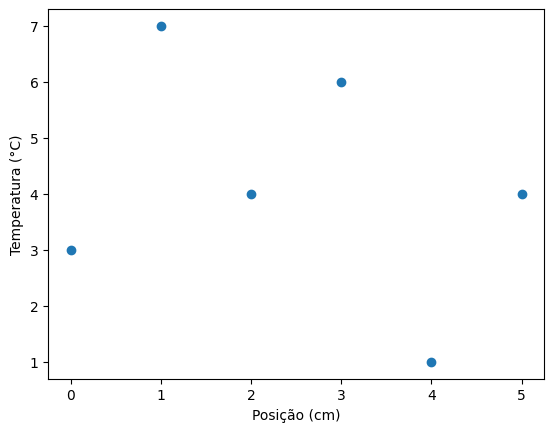

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(6)
y = [3, 7, 4, 6, 1, 4]
plt.plot(x, y, 'o')
plt.xlabel("Posição (cm)")
plt.ylabel("Temperatura (°C)")
plt.show()

E agora, queremos predizer a temperatura em pontos intermediários, como em 2,3 cm. Um forma é interpolar com retas usando `interp1d`. Essa função retorna uma função que pode ser usada em qualquer ponto intermediário.

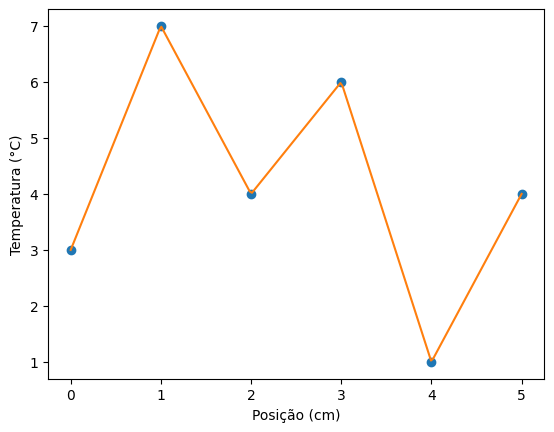

In [50]:
from scipy.interpolate import interp1d

# Plota os dados novamente
plt.plot(x, y, 'o')
plt.xlabel("Posição (cm)")
plt.ylabel("Temperatura (°C)")

funcao = interp1d(x, y)     # cria uma função de interpolação
xi = np.linspace(0, 5, 200) # cria um array denso para x
yi = funcao(xi)             # calcula a ordenada em cada x
plt.plot(xi, yi)

plt.show()

In [54]:
print(f"A temperatura em 2,5cm é {funcao(2.5):.1f}°C")

A temperatura em 2,5cm é 5.0°C


Usando splines, conseguimos obter uma forma suave entre os pontos. `splrep` gera os parâmetros da spline para um determinado conjunto de dados e `splev` calcula as abscissas para qualquer x.

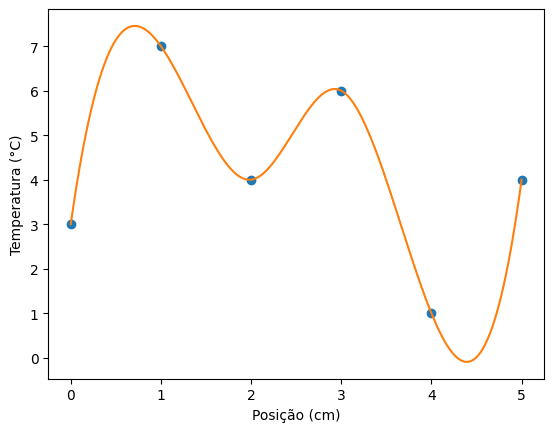

In [55]:
from scipy.interpolate import splev, splrep

# Plota os dados novamente
plt.plot(x, y, 'o')
plt.xlabel("Posição (cm)")
plt.ylabel("Temperatura (°C)")

xs = np.linspace(0, 5, 200) # cria um array denso para x
params = splrep(x,y)        # parâmetros para a spline
ys = splev(xs, params)      # calcula as ordenadas
plt.plot(xs, ys)
plt.show()

In [56]:
print(f"A temperatura em 2,5cm é {splev(2.5, params):.1f}°C")

A temperatura em 2,5cm é 5.2°C


# 4. Integração numérica &ndash; integrate

Este módulo possui funções para calcular integrais de forma numérica, como função a `quad`. Imagine que você queira calcular a posição de um objeto com velocidade

$$
v(t) = -5\, t + t^2 + 10,
$$

depois de 10 segundos. Como $v = dx/dt$, a integral da velocidade fornece a distância percorrida $\Delta x$ entre dois tempos. Portanto, precisamos integrar $v(t)$ entre 0 e 10 segundos.

In [57]:
from scipy.integrate import quad

# O parâmetro da função integrada pode ter qualquer nome
def v(t):
  return -5 * t + t**2 + 10

dx = quad(v, 0, 10)[0]

print(f"Distância percorrida = {dx:.2f} m")

Distância percorrida = 183.33 m


## Retornando as integrais


O exemplo acima é interessante mas às vezes queremos uma função que já retorne o valor da integral. Se a função integrada depende de parâmetros, precisamos defini-la dentro da outra função.

*Exemplo*: Queremos uma função que retorne a área de um círculo de raio $R$, ou seja:
$$
4 \int_0^R\! \sqrt{R^2 - x^2} dx
$$

In [58]:
import numpy as np
from scipy.integrate import quad

def integral_circulo(R) -> float:
  "Calcula numericamente a área de um círculo de raio R."
  def funcao(x):
    # Use sempre as funções do NumPy
    return np.sqrt(R**2 - x**2)
  # Lembre-se de que quad retorna (integral, erro)
  return 4 * quad(funcao, 0, R)[0]

r = 5
print("O raio do círculo é", r)
print("Área (integração numérica) =", integral_circulo(r))
print("Área (fazendo a conta)     =", np.pi * r**2)

O raio do círculo é 5
Área (integração numérica) = 78.53981633974486
Área (fazendo a conta)     = 78.53981633974483


#### Exercício [&frac12; pt]. Integrando funções.
Utilizando a função `quad` do módulo `scipy.integrate`, escreva funções que calculem as integrais das funções:

a) $f(x) = 7 x^{5/2} + 4$

b) $g(t) = t^2 \cos(0.5 t)$

c) $h(u) = \ln (-2u + u^{-5})$

no intervalo $[a, b)$, onde a e b são parâmetros das funções.

In [84]:
def integrar(func, a: float, b: float) -> tuple:
    if a == b:
        return 0, 0

    if a > b:
        a, b = b, a

    resp, erro = quad(func, a, b)
    return resp, erro

f = lambda x: 7 * x**(5/2) + 4
g = lambda t: t**2 * np.cos(0.5 * t)
h = lambda u: np.log(-2*u + u**(-5))

F = integrar(f, 1, 2)
G = integrar(g, 1, 2)
H = integrar(h, -8, -6)

print(f'Integral de f(x): {F[0]:.6f} erro relativo: {F[1]:.6f}')
print(f'Integral de g(t): {G[0]:.6f} erro relativo: {G[1]:.6f}')
print(f'Integral de h(u): {H[0]:.6f} erro relativo: {H[1]:.6f}') #conferi no geogebra

Integral de f(x): 24.627417 erro relativo: 0.000000
Integral de g(t): 1.604366 erro relativo: 0.000000
Integral de h(u): 5.271260 erro relativo: 0.000000


# 5. Ajuste de funções &ndash; optimize

Neste módulo, encontramos funções para **encontrar as raízes de uma função** (os valores de $x$ para os quais $f(x)=0$). Só que vamos olhar uma função ainda mais interessante: `curve_fit`, que usa o *método dos mínimos quadrados* para **ajustar uma função a um conjunto de dados**.

*Como funciona?* Primeiro precisamos definir uma função de $x$ e outros parâmetros. Por exemplo: a função de uma reta cujos argumentos são a abscissa `x` e os coeficientes angular `m` e linear `n`:

In [85]:
def f(x, m, n):
  "Calcula a ordenada de uma reta em função de x e parâmetros."
  return m*x + n

Vamos criar um conjunto de dados *ruidoso*, como se fosse o resultado de medidas experimentais, para testar o ajuste com a função da reta. Se não fosse pela função `np.random.rand`, os pontos seriam de uma reta com coeficientes $m=3$ e $n=2$.

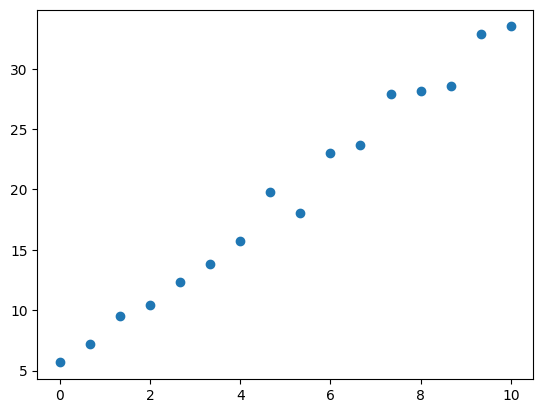

In [86]:
import matplotlib.pyplot as plt
from datetime import datetime
np.random.seed(int(datetime.now().timestamp())) #Assim vai variar sempre que executar
xdata = np.linspace(0, 10, 16)
num_pontos = len(xdata)
ydata = 3*xdata + 2 + 4*np.random.rand(num_pontos)

plt.plot(xdata, ydata, 'o');

In [87]:
# Vamos ajustar e olhar os parâmetros do ajuste
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, xdata, ydata)
popt

array([2.86916024, 5.04168731])

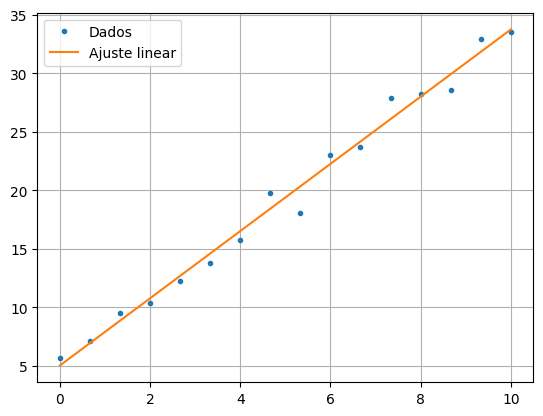

In [88]:
# Agora gera uma reta com os parâmetros encontrados
m = popt[0]  # melhor inclinação
n = popt[1]  # melhor elevação
xfit = np.linspace(0, 10)
yfit = f(xfit, m, n)

# E plota junto aos dados experimentias
plt.plot(xdata, ydata, '.', label="Dados")
plt.plot(xfit, yfit, label="Ajuste linear")
plt.legend()
plt.grid()
plt.show()

Interessante também é usar a **matriz de covariância** `pcov` para calcular os erros de ajuste nos parâmetros:

In [101]:
d = np.sqrt(np.diag(pcov))
erro_m = d[0]
erro_n = d[1]
print(f"m = {m:.1f} ± {erro_m:.1f}")
print(f"n = {n:.1f} ± {erro_n:.1f}")

m = 0.9 ± 0.1
n = 25.0 ± 0.2


Para verificar que o erro tem a ver com a dispersão dos dados, faça o procedimento acima retirando a componente aleatória das ordenadas.

#### Exercício [&frac12;pt]. Ajuste senoidal.

Nosso universo é permeado de fenômenos ondulatórios: propagação de luz e som, oscilação de pêndulos, terremotos *etc.*  A próxima célula gera um conjunto de dados fictício para medidas da altura das marés:

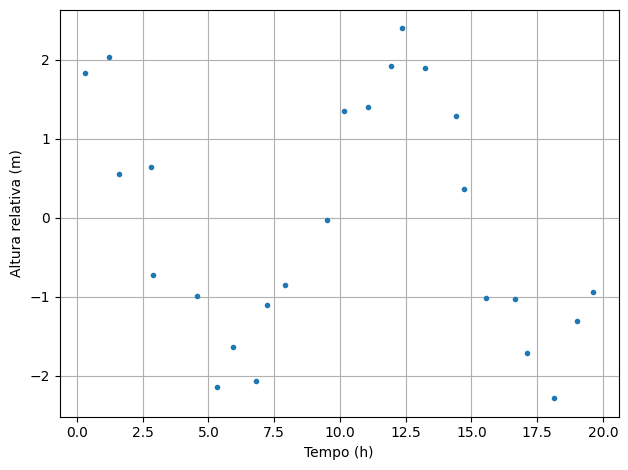

In [102]:
import numpy as np
from numpy.random import rand

n = 25
x_medidas = np.linspace(0, 20, n)
y_medidas = 2*np.cos(0.507*x_medidas + 0.2)
# Adiciona uma incerteza aos dados
x_medidas += rand(n)-0.5
y_medidas += rand(n)-0.5

plt.plot(x_medidas, y_medidas, '.')
plt.ylabel("Altura relativa (m)")
plt.xlabel("Tempo (h)")
plt.grid()
plt.tight_layout()
plt.show()

Agora tente ajustar os dados com uma função senoidal

$$
h(t) = A \cos\left(\frac{2\pi}{T} t + \phi\right),
$$

onde os **parâmetros a serem ajustados** são a amplitude da onda $A$, o período de oscilação $T$ e a fase $\phi$ (letra grega phi). Mas lembre de sempre usar as funções do `numpy`, não do `math`. Plote também os dados com o ajuste e imprima os valores ajustados com erro.

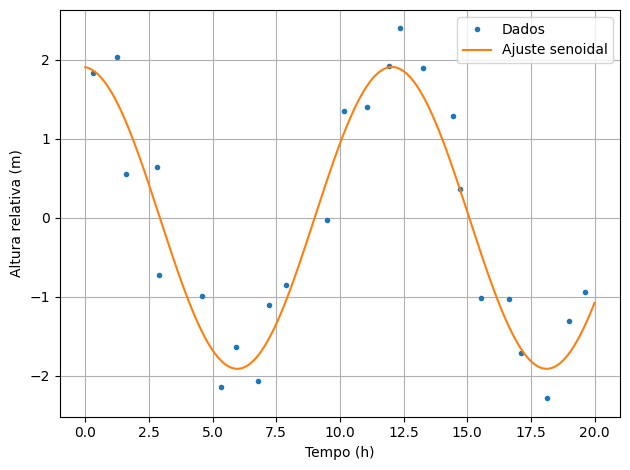

Parâmetros do ajuste:
a = 1.91 ± 0.12
T = 12.15 ± 0.29
phi = 0.05 ± 0.14


In [103]:
def h(t, a, T, phi):
    return a * np.cos(2 * np.pi / T * t + phi)


popt, pcov = curve_fit(h, x_medidas, y_medidas, p0=(2, 12, 0))
a, T, phi = popt


xfit = np.linspace(0, 20, int(1e6))
yfit = h(xfit, a, T, phi)

plt.plot(x_medidas, y_medidas, '.', label="Dados")
plt.plot(xfit, yfit, label="Ajuste senoidal")
plt.legend()
plt.ylabel("Altura relativa (m)")
plt.xlabel("Tempo (h)")
plt.grid()
plt.tight_layout()
plt.show()


d = np.sqrt(np.diag(pcov))
erro_a = d[0]
erro_T = d[1]
erro_phi = d[2]

print(f"Parâmetros do ajuste:")
print(f"a = {a:.2f} ± {erro_a:.2f}")
print(f"T = {T:.2f} ± {erro_T:.2f}")
print(f"phi = {phi:.2f} ± {erro_phi:.2f}")

# Avalie

O que você achou deste notebook? Dê uma nota de 1 a 5:

In [ ]:
nota = 5
if 1 <= nota <= 5:
  print("O que achei do notebook: " + "😨😞😐🙂🥰"[nota-1])
else:
  print("Sem nota")